# RaDICaL Dataset SDK

> The RaDICaL Dataset: A synchronized and calibrated low-level Radar, RGB-D and IMU dataset.

![CI](https://github.com/moodoki/radical_sdk/workflows/CI/badge.svg)

<div>
    <div style="position:relative;padding-top:56.25%">
        <iframe src="https://www.youtube.com/embed/l0AyUw59w7g" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen style="position:absolute;top:0;left:0;width:100%;height:100%;"></iframe>
    </div>
</div>

This is pre-alpha research quality code, and is being actively developed on.
Anything may change at anytime. Please check back here often.

Bug reports are very much appreciated.

# TODO

 - [x] Radar config reader
 - [x] Read from aligned H5 dataset
 - [ ] Read from raw bags (to produce aligned/unaligned H5 datasets)
 - [x] Polar to Cartesian Projection
 - [ ] Camera/Radar coordinate transforms

## Install

`python -m pip install git+https://github.com/moodoki/radical_sdk.git`

In [ ]:
#hide

#For an easier life when developing
%load_ext autoreload
%autoreload 2

In [ ]:
#hide

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # prevent ugly warnings from cluttering documentation
os.environ['TF_ADDONS_PY_OPS'] = '0'
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

## How to use

> Our dataset is distrbuted under [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/) license. The dataset is currently under review and will be made available soon. DOI: [10.13012/B2IDB-3289560_V1](https://doi.org/10.13012/B2IDB-3289560_V1). 



Download the dataset at our [project page](https://publish.illinois.edu/radicaldata/).

A small sample (50 frames) to try things our can be found [here](https://fireball.teckyianlim.me/file/flaming-cake/indoor_sample_50.h5). [md5sum: b195ff422cc4c979eeb81623899050cb]



Reading and displaying depth and RGB is easy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 20]

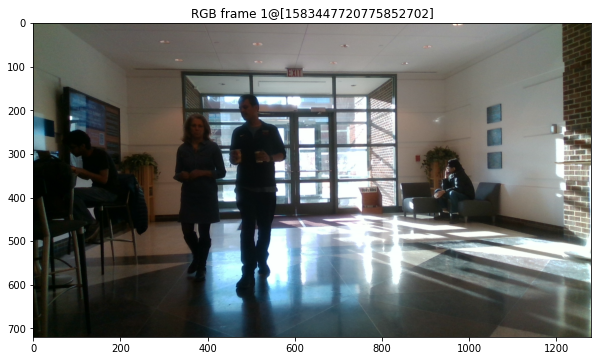

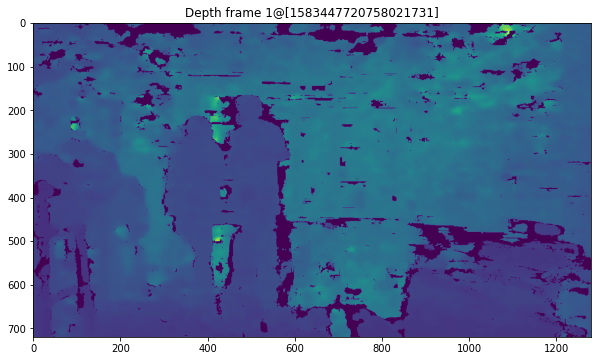

In [ ]:
from radicalsdk.h5dataset import H5DatasetLoader

data = H5DatasetLoader('../samples/indoor_sample_50.h5')


frame_idx = 1
plt.figure()
plt.imshow(data['rgb'][frame_idx][..., ::-1])
plt.title(f'RGB frame {frame_idx}@{data["rgb_timestamp"][frame_idx]}')
plt.show()
plt.figure()
plt.imshow(data['depth'][frame_idx])
plt.title(f'Depth frame {frame_idx}@{data["depth_timestamp"][frame_idx]}')
plt.show()

The radar data is a 3D array arranged slow_time, antenna, fast_time.

`RadarFrame` encapsulates the necessary processing and saves computation on subsequent calls
as steps can be very expensive.

In [ ]:
from radicalsdk.radar.config_v1 import read_radar_params
from radicalsdk.radar.v1 import RadarFrame

# Read config and configure RadarFrame object
radar_config = read_radar_params('../samples/indoor_human_rcs.cfg')
rf = RadarFrame(radar_config)

### Range Azimuth in Polar Coordinates

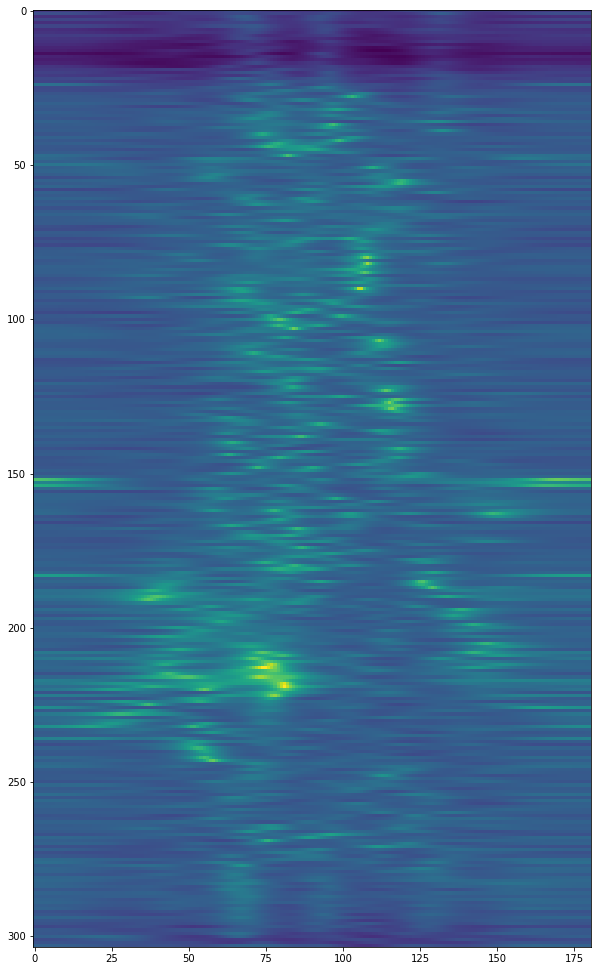

In [ ]:
plt.figure()
plt.imshow(np.log(np.abs(rf.compute_range_azimuth(data['radar'][1]))))
plt.show()

### Projecting to cartesian

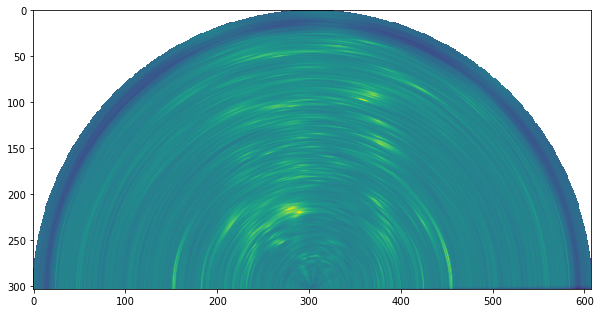

In [ ]:
from radicalsdk.geometry import PolarToCartesianWarp

p2c = PolarToCartesianWarp()

cartesian_radar = p2c(np.abs(rf.range_azimuth_capon)[np.newaxis, ..., np.newaxis])
plt.figure()
with np.errstate(divide='ignore'):
    plt.imshow(np.log(cartesian_radar[0, ...]))
plt.show()